### The purpose of this exercise is to understand the trends in video game sales.

In [91]:
import pandas as pd
import numpy  as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import EngFormatter
fmt = EngFormatter(places=1)
from plotly import graph_objects as go
from plotly import express as px
# import plotly.plotly as py
from plotly.offline import init_notebook_mode,iplot

# WordCloud Packages
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [93]:
games = pd.read_csv("./dataset/Video_Games.csv")
games = pd.DataFrame(games)

In [94]:
games.head()

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

In [95]:
print("Dataset shape :",games.shape)
games.columns = [i.lower() for i in games.columns]

Dataset shape : (16719, 16)


In [96]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16717 non-null  object 
 1   platform         16719 non-null  object 
 2   year_of_release  16450 non-null  float64
 3   genre            16717 non-null  object 
 4   publisher        16665 non-null  object 
 5   na_sales         16719 non-null  float64
 6   eu_sales         16719 non-null  float64
 7   jp_sales         16719 non-null  float64
 8   other_sales      16719 non-null  float64
 9   global_sales     16719 non-null  float64
 10  critic_score     8137 non-null   float64
 11  critic_count     8137 non-null   float64
 12  user_score       10015 non-null  object 
 13  user_count       7590 non-null   float64
 14  developer        10096 non-null  object 
 15  rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [97]:
games.describe()

year_of_release      na_sales      eu_sales      jp_sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        other_sales  global_sales  critic_score  critic_count    user_count  
count  16719.000000  16719.000000   8137.000000   8137.000000   7590.000000  
mean       0.047332      0.533543     68.967679     26.360821    162.229908  
std        0.186710      1.547935     13.938165     18.980495    561.282326  
min        0.000000      0.010000     13.000000      3.000000      4.000000  
25%        0.000000      0.060000     60.000000     12.000000     10.000000  
50%        0.010000      0.170000     71.000000     21.000000     24.000000  
75%        0.030000      0.470000     79.000000     36.000000     81.000000  
max       10.570000     82.530000     98.000000    113.000000  10665.000000

In [98]:
games.dropna(how = "all",inplace = True)
print(games.shape)

(16719, 16)


## EDA

## Year wise global game sales
### The maximum number of games sales occured in 2008.

Text(0, 0.5, 'Global sales in millions')

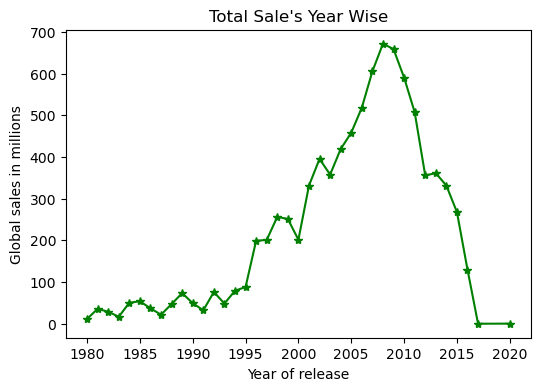

In [62]:
tot_sales_year_wise = pd.pivot_table(games,index = "year_of_release",values = "global_sales",aggfunc= np.sum)
#print(avg_sales_year_wise) #uncomment this to know Total sale's value's with respect each year.
plt.plot(tot_sales_year_wise.index,tot_sales_year_wise["global_sales"],color = 'g',marker = "*")
plt.title("Total Sale's Year Wise")
plt.xlabel("Year of release")
plt.ylabel("Global sales in millions")

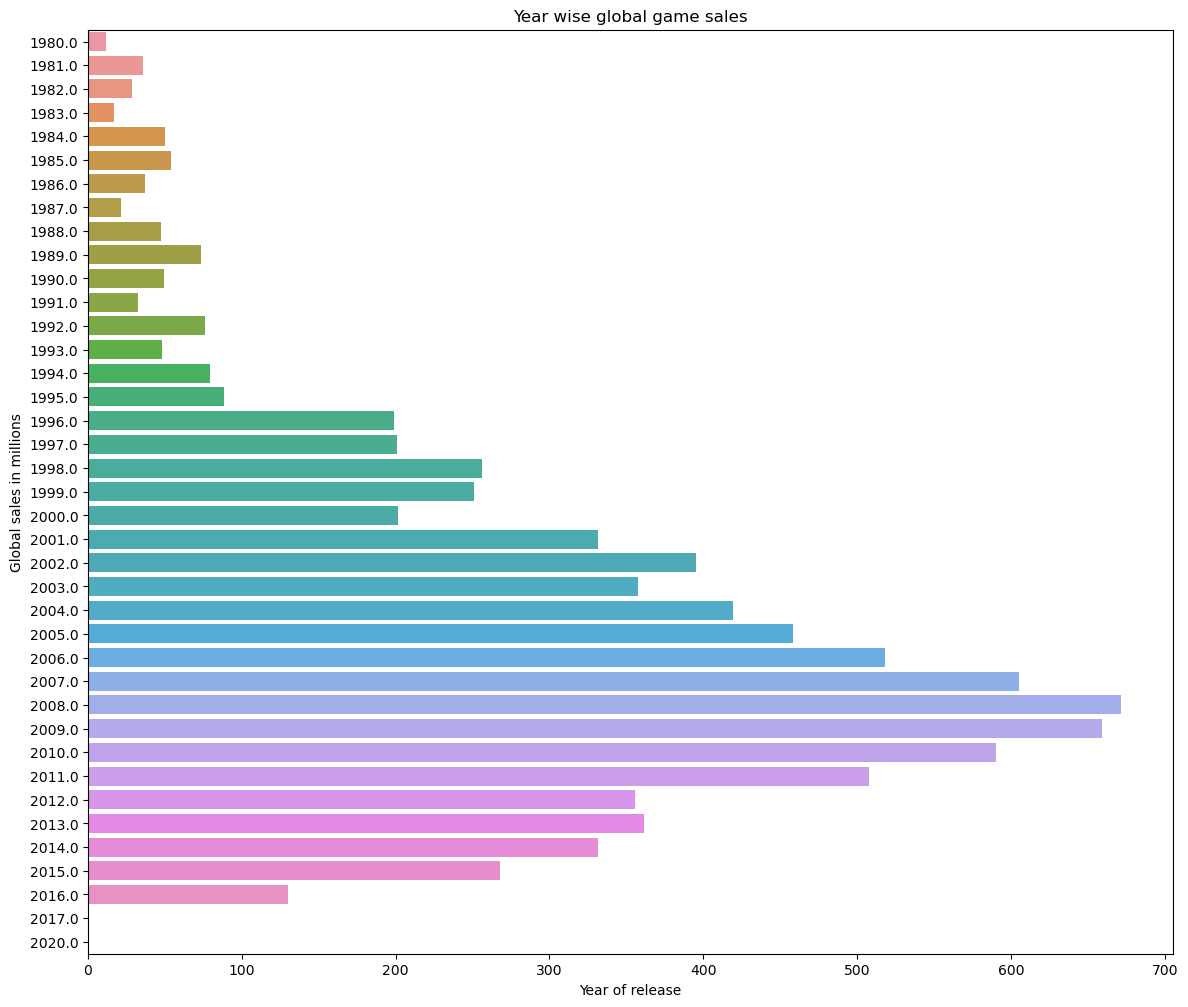

In [111]:
plt.rcParams['figure.figsize'] = (14,12)
year_wise_game_sales = games.groupby(['year_of_release'])[['global_sales']].sum()
sns.barplot(year_wise_game_sales, x = "global_sales", y = year_wise_game_sales.index, orient='h')
plt.title("Year wise global game sales")
plt.xlabel("Year of release")
plt.ylabel("Global sales in millions")
plt.show()

## Platform wise global sales
### PS2 tops the charts. Combined Playstation game sales far surpass Xbox.

Text(0.5, 1.0, 'Top 10 Platform wise global game sales :')

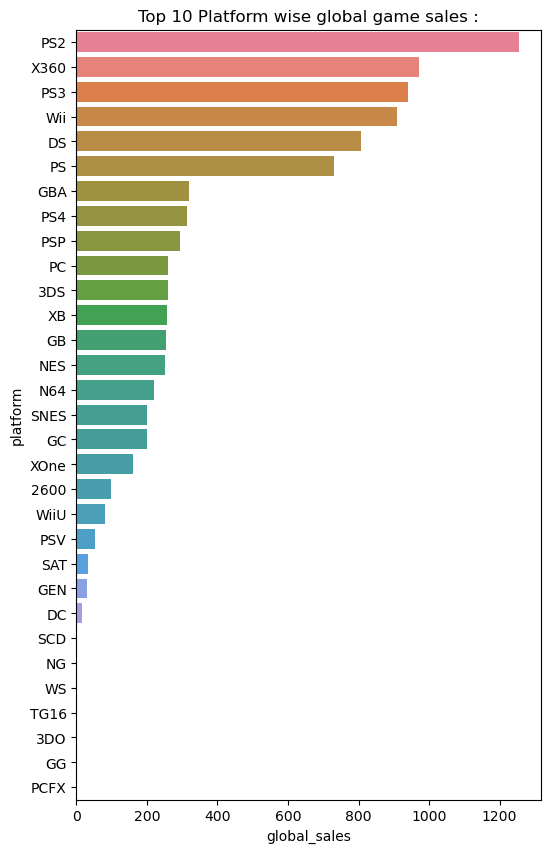

In [45]:
plt.rcParams['figure.figsize'] = (6,10)
platform_wise_game_sales  = pd.pivot_table(games ,index = ["platform"] ,values = ["global_sales"], aggfunc = np.sum)
platform_wise_game_sales  = platform_wise_game_sales.sort_values(by = "global_sales",ascending  = False)
sns.barplot(platform_wise_game_sales, x = "global_sales", y = platform_wise_game_sales.index,orient = "h",palette = "husl")
plt.title("Top 10 Platform wise global game sales :")

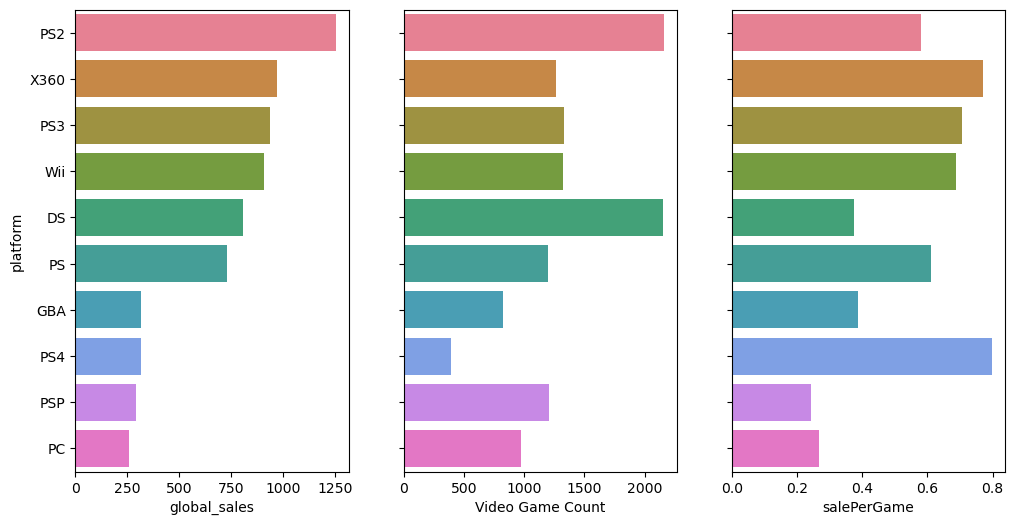

In [46]:
plt.rcParams['figure.figsize'] = (8,6)
platform_wise_game_sales  = games.groupby(['platform'])[['name','global_sales']].agg({'name':'count', 'global_sales':'sum'})
platform_wise_game_sales['salePerGame'] = platform_wise_game_sales['global_sales']/platform_wise_game_sales['name']
#pd.pivot_table(games ,index = "genre" ,values = "global_sales",aggfunc = np.sum)
platform_wise_game_sales  = platform_wise_game_sales.sort_values(by = "global_sales",ascending  = False).head(10)

plt.rcParams['figure.figsize'] = (12,6)
fig, axes = plt.subplots(1,3)

c1 = sns.barplot(platform_wise_game_sales, x = "global_sales", y=platform_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[0])
c2 = sns.barplot(platform_wise_game_sales, x = "name", y=platform_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[1])
c2.set_xlabel("Video Game Count")
c2.set_ylabel("")
c2.set_yticklabels([])
c3 = sns.barplot(platform_wise_game_sales, x = "salePerGame", y=platform_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[2])
c3.set_ylabel("")
c3.set_yticklabels([])
plt.show()

## Genre wise sales

### In terms of gross sale volumne action emerges at the top, however it is also the genre with the most number of titles. If we check salePerGame in a given genre, Platform and Shooter games are at the top. 

<i> Who can say no to a good shooting game? </i>

Text(0.5, 1.0, 'Top 10 Genre wise global game sales :')

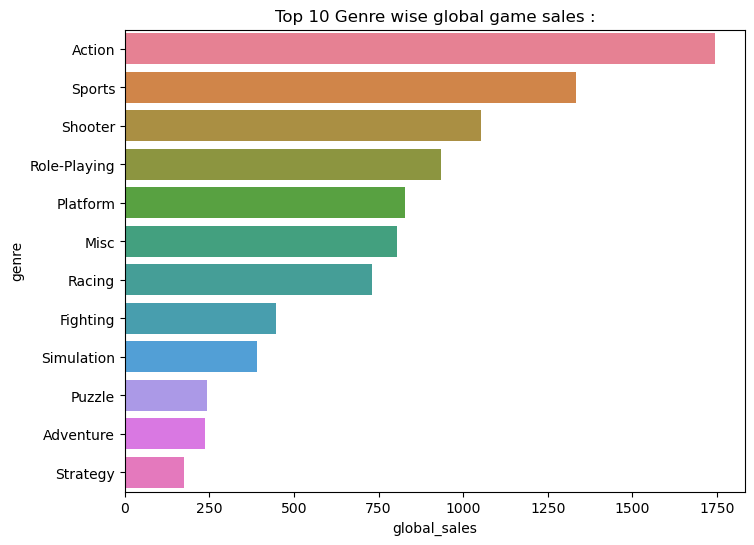

In [47]:
plt.rcParams['figure.figsize'] = (8,6)
genre_wise_game_sales  = games.groupby(['genre'])[['name','global_sales']].agg({'name':'count', 'global_sales':'sum'})
genre_wise_game_sales['salePerGame'] = genre_wise_game_sales['global_sales']/genre_wise_game_sales['name']
#pd.pivot_table(games ,index = "genre" ,values = "global_sales",aggfunc = np.sum)
genre_wise_game_sales  = genre_wise_game_sales.sort_values(by = "global_sales",ascending  = False)
sns.barplot(genre_wise_game_sales, x = "global_sales", y=genre_wise_game_sales.index, orient = "h",palette = "husl")
plt.title("Top 10 Genre wise global game sales :")

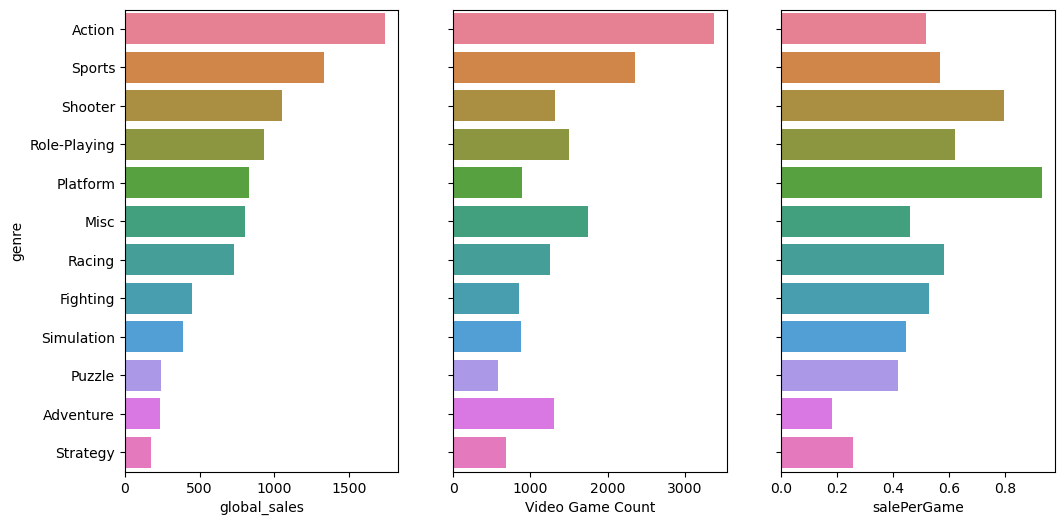

In [48]:
plt.rcParams['figure.figsize'] = (12,6)
fig, axes = plt.subplots(1,3)

c1 = sns.barplot(genre_wise_game_sales, x = "global_sales", y=genre_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[0])
c2 = sns.barplot(genre_wise_game_sales, x = "name", y=genre_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[1])
c2.set_xlabel("Video Game Count")
c2.set_ylabel("")
c2.set_yticklabels([])
c3 = sns.barplot(genre_wise_game_sales, x = "salePerGame", y=genre_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[2])
c3.set_ylabel("")
c3.set_yticklabels([])
plt.show()

In [106]:
fig = px.scatter(games, x="year_of_release", y="global_sales", color="genre",
                 size='global_sales', hover_data=['name'],
                 title="Year Wise Global Video Game Sales by Genere",
                 labels={'x':'Year', 'y':'Global Sales In Millions'}
                )

fig.show()

## Top 20 global game sales, by publishers

### Nintendo, EA and Activision are the top 3.

In [49]:
#plt.rcParams['figure.figsize'] = (8,6)
#publisher_wise_game_sales  = pd.pivot_table(games ,index = "publisher" ,values = "global_sales",aggfunc = np.sum)
#publisher_wise_game_sales  = publisher_wise_game_sales.sort_values(by = "global_sales",ascending  = False).head(20)
#sns.barplot(publisher_wise_game_sales, x="global_sales",y=publisher_wise_game_sales.index,orient = "h",palette = "husl")
#plt.title("Top 10 Publisher wise global game sales :") 

### Game publishers portfolio

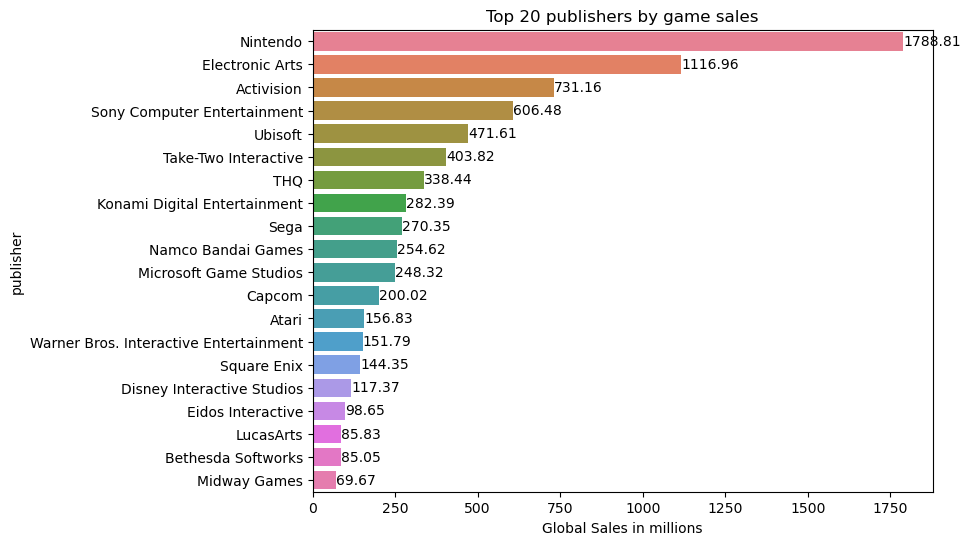

In [124]:
plt.rcParams['figure.figsize'] = (8,6)
publisher_wise_game_sales  = games.groupby(['publisher'])[['name','global_sales']].agg({'name':'count', 'global_sales':'sum'})
publisher_wise_game_sales['salePerGame'] = publisher_wise_game_sales['global_sales']/publisher_wise_game_sales['name']
#pd.pivot_table(games ,index = "genre" ,values = "global_sales",aggfunc = np.sum)
publisher_wise_game_sales  = publisher_wise_game_sales.sort_values(by = "global_sales",ascending  = False).head(20)
bp = sns.barplot(publisher_wise_game_sales, x = "global_sales", y=publisher_wise_game_sales.index, orient = "h",palette = "husl")
for i in bp.containers:
    bp.bar_label(i,)
plt.title("Top 20 publishers by game sales")
plt.xlabel("Global Sales in millions")
plt.show()

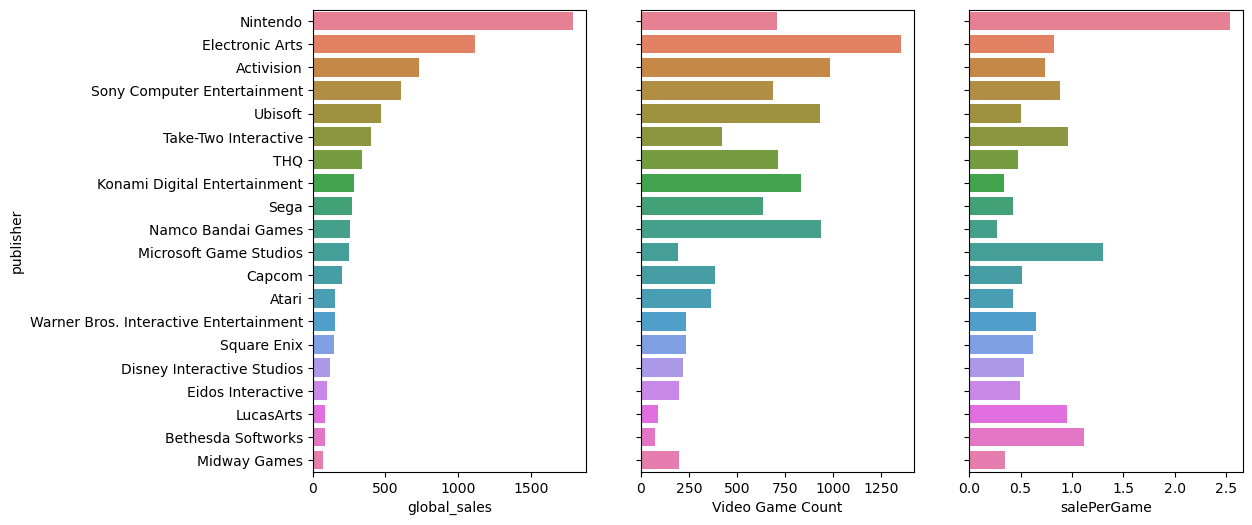

In [51]:
plt.rcParams['figure.figsize'] = (12,6)
fig, axes = plt.subplots(1,3)

c1 = sns.barplot(publisher_wise_game_sales, x = "global_sales", y=publisher_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[0])
c2 = sns.barplot(publisher_wise_game_sales, x = "name", y=publisher_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[1])
c2.set_xlabel("Video Game Count")
c2.set_ylabel("")
c2.set_yticklabels([])
c3 = sns.barplot(publisher_wise_game_sales, x = "salePerGame", y=publisher_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[2])
c3.set_ylabel("")
c3.set_yticklabels([])
plt.show()

In [ ]:
publisher_wise_game_sales

In [52]:
def genreByPublisher(genre):
    plt.rcParams['figure.figsize'] = (12,6)
    fig, axes = plt.subplots(1,3)
    publisher_wise_game_sales  = games[games.genre == genre].groupby(['publisher'])[['name','global_sales']].agg({'name':'count', 'global_sales':'sum'})
    publisher_wise_game_sales['salePerGame'] = publisher_wise_game_sales['global_sales']/publisher_wise_game_sales['name']
    publisher_wise_game_sales  = publisher_wise_game_sales.sort_values(by = "global_sales",ascending  = False).head(20)
    c1 = sns.barplot(publisher_wise_game_sales, x = "global_sales", y=publisher_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[0])
    c2 = sns.barplot(publisher_wise_game_sales, x = "name", y=publisher_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[1])
    c2.set_xlabel("Video Game Count")
    c2.set_ylabel("")
    c2.set_yticklabels([])
    c3 = sns.barplot(publisher_wise_game_sales, x = "salePerGame", y=publisher_wise_game_sales.index, orient = "h",palette = "husl", ax=axes[2])
    c3.set_ylabel("")
    c3.set_yticklabels([])
    plt.show()

Genre: Action


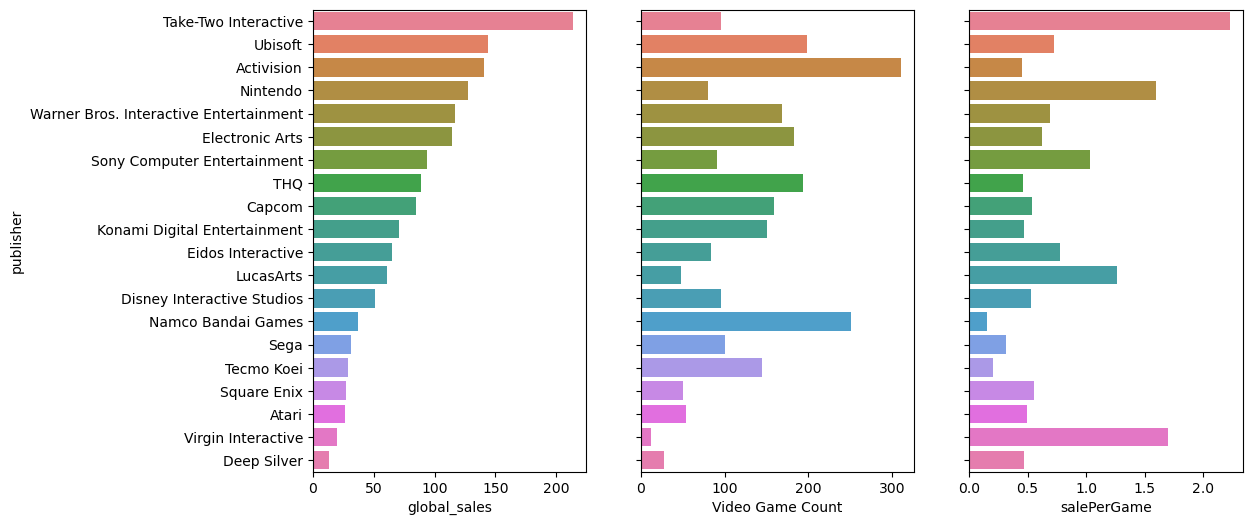

Genre: Sports


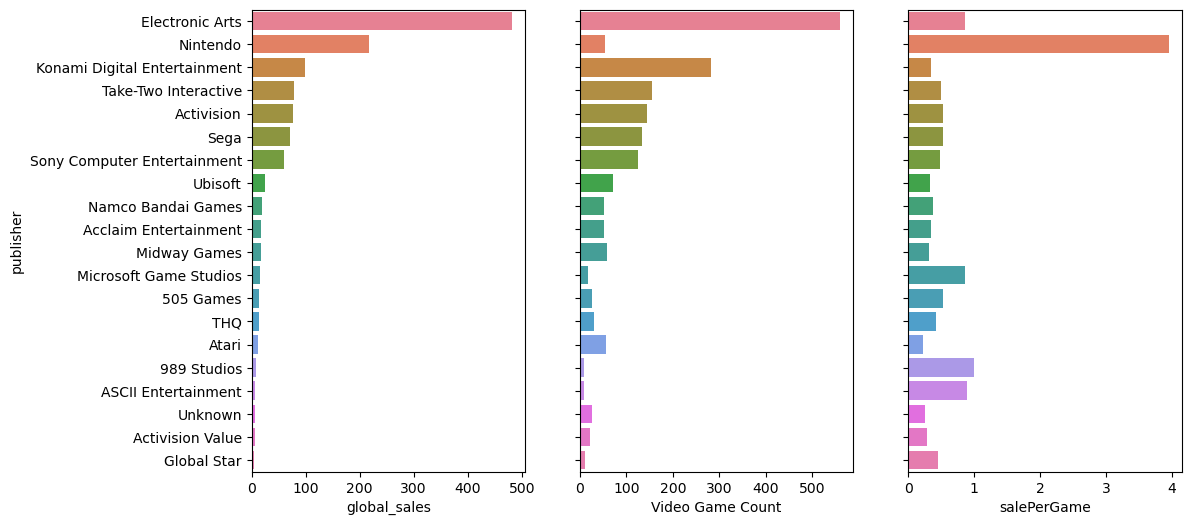

Genre: Shooter


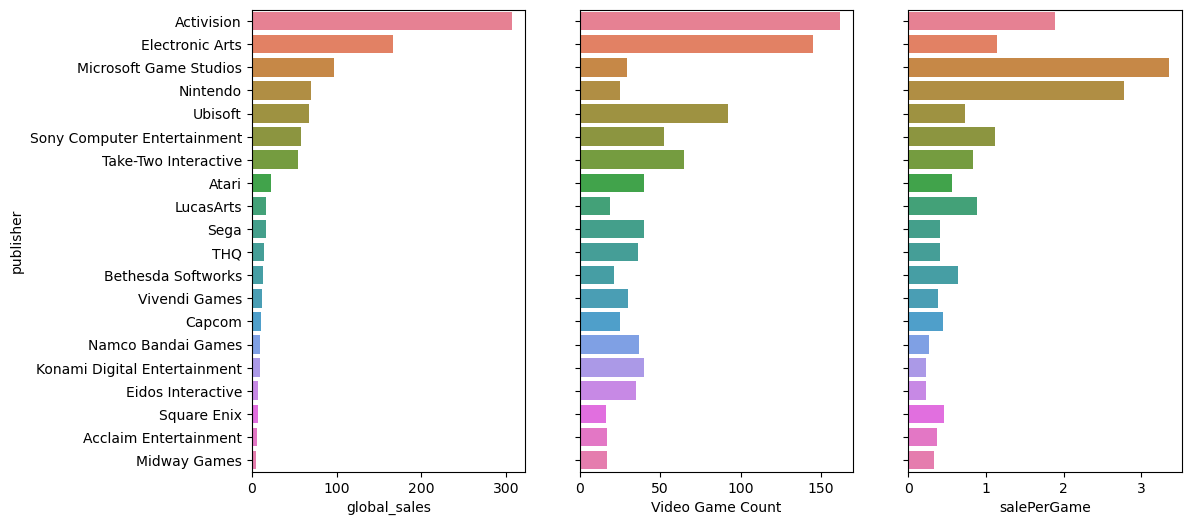

Genre: Role-Playing


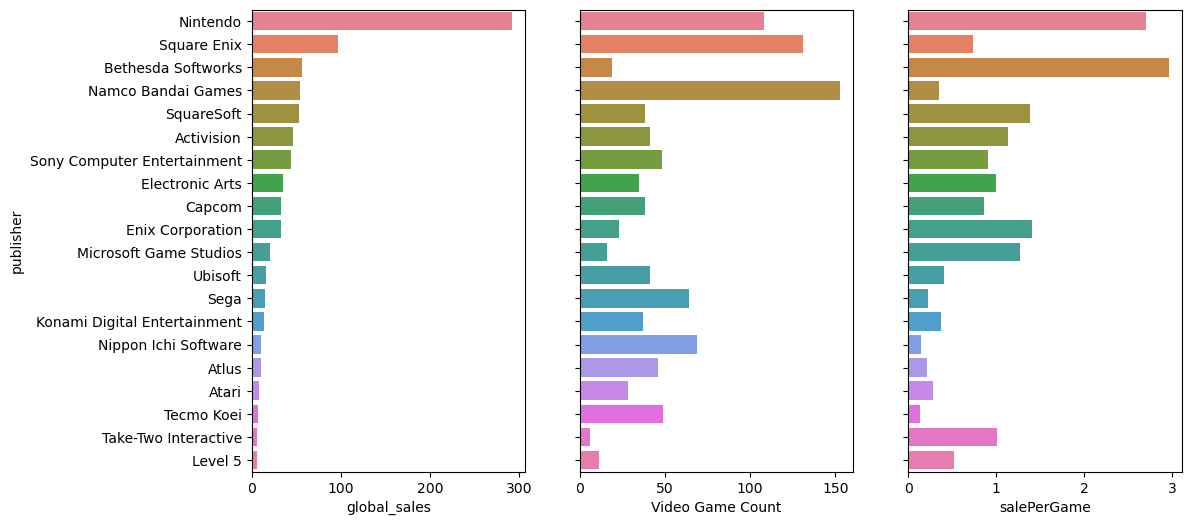

Genre: Platform


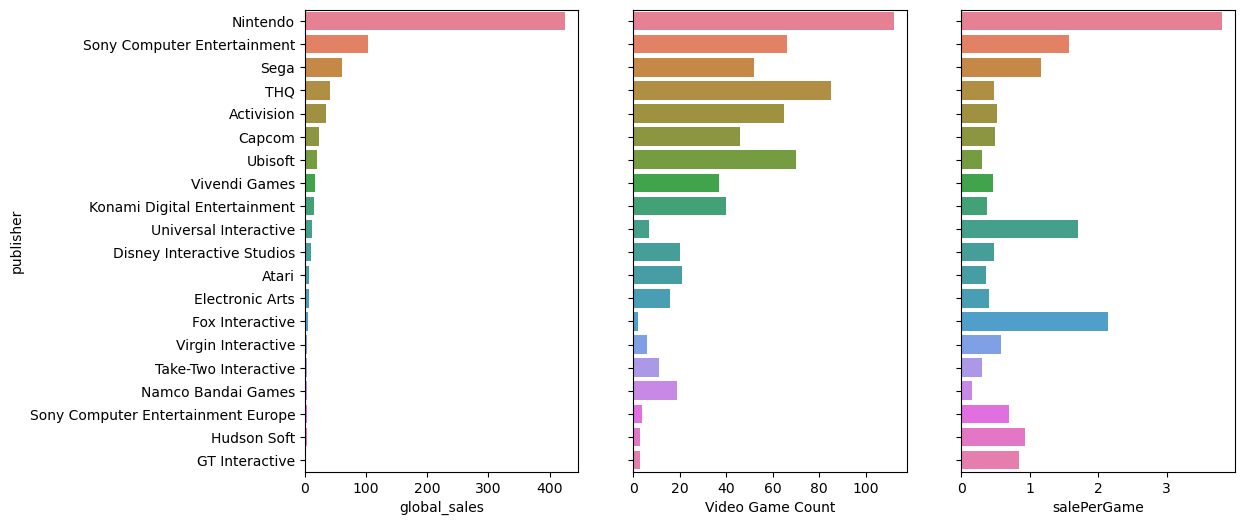

Genre: Misc


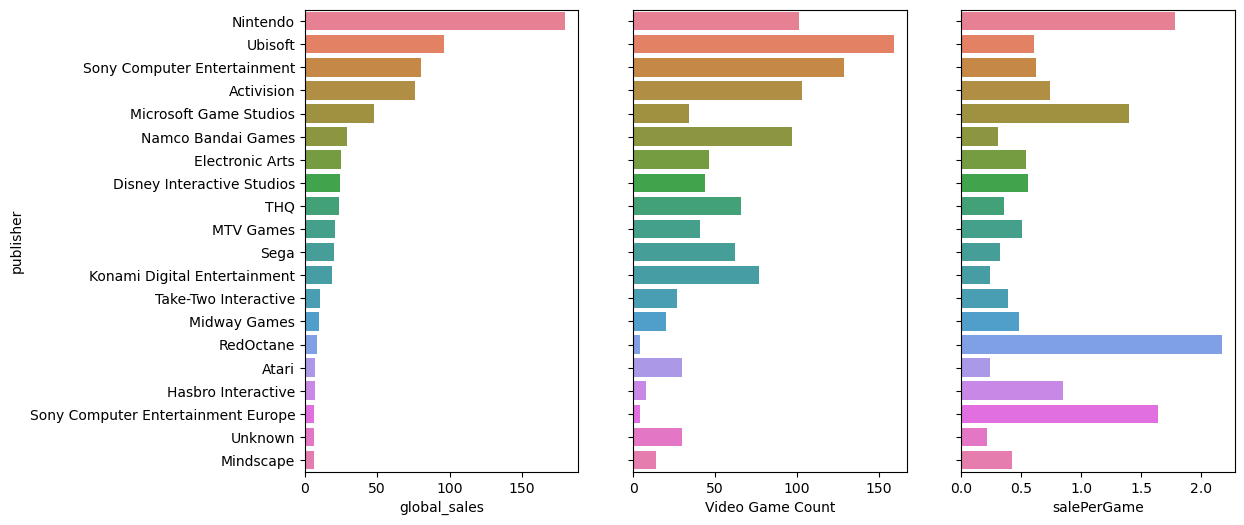

Genre: Racing


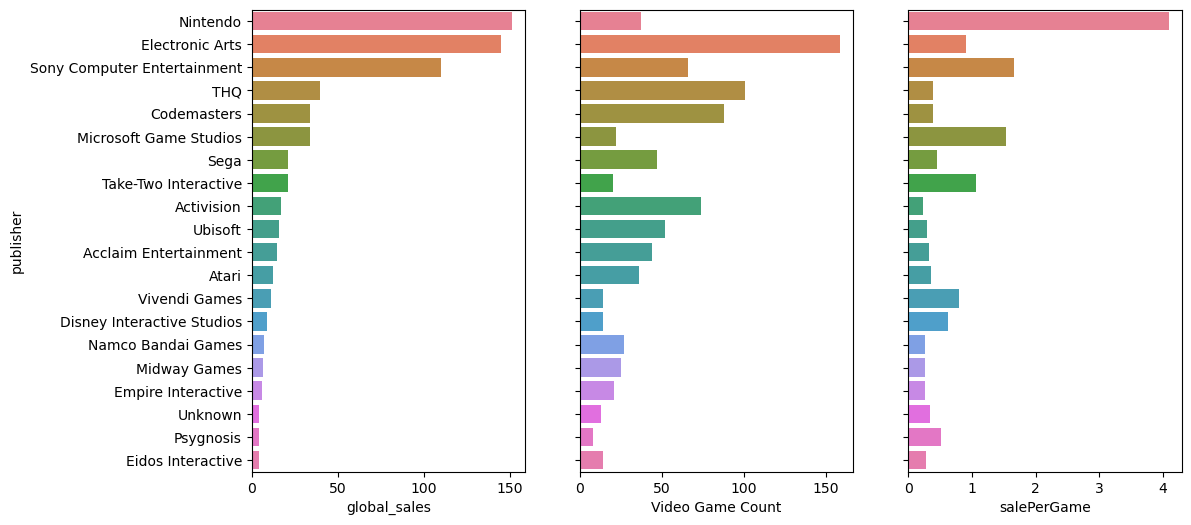

Genre: Fighting


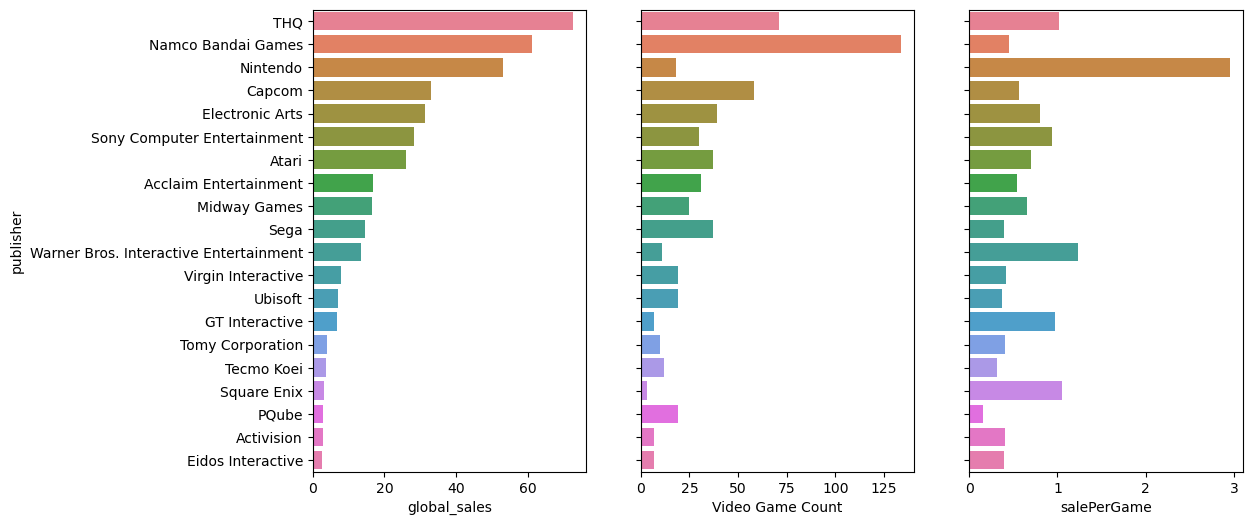

Genre: Simulation


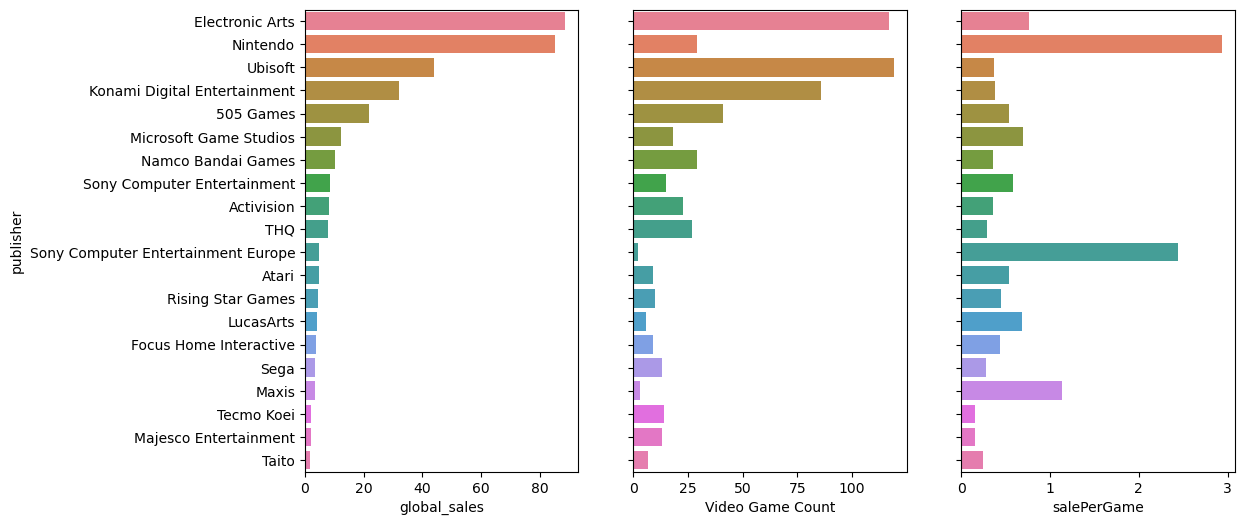

Genre: Puzzle


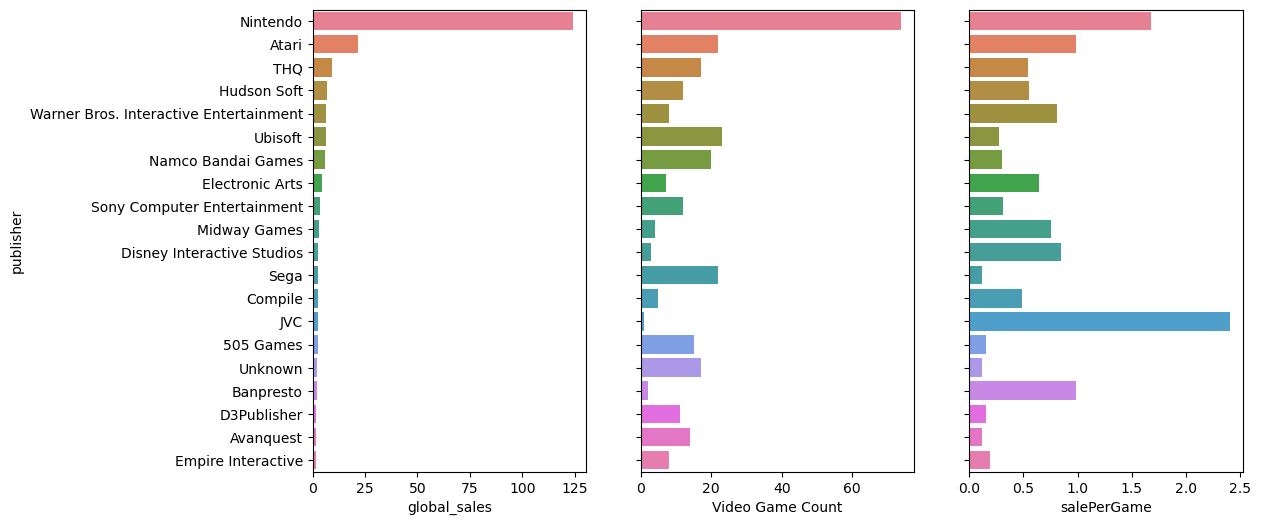

Genre: Adventure


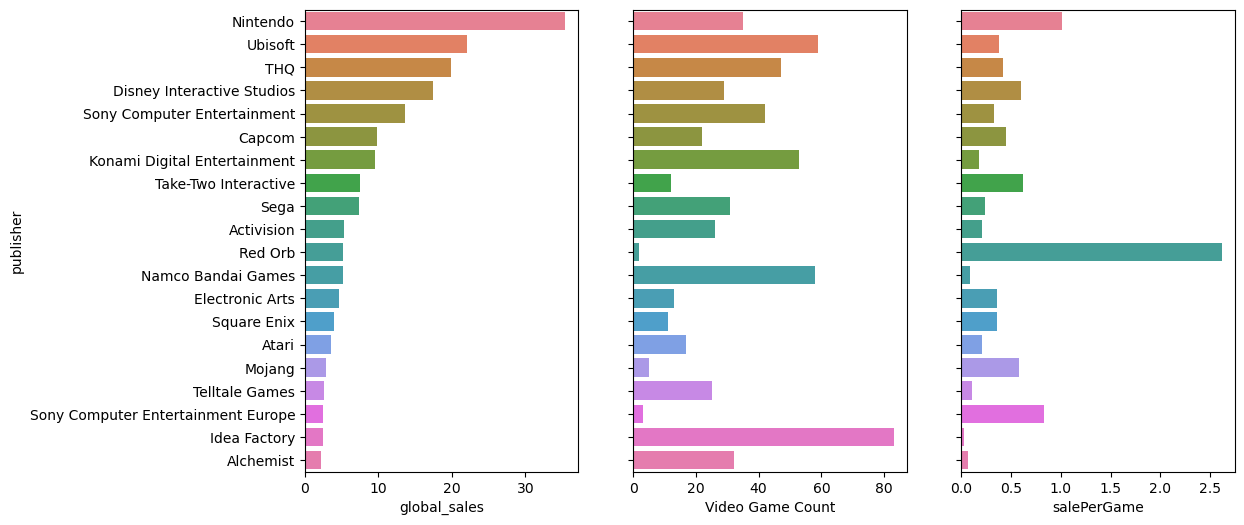

Genre: Strategy


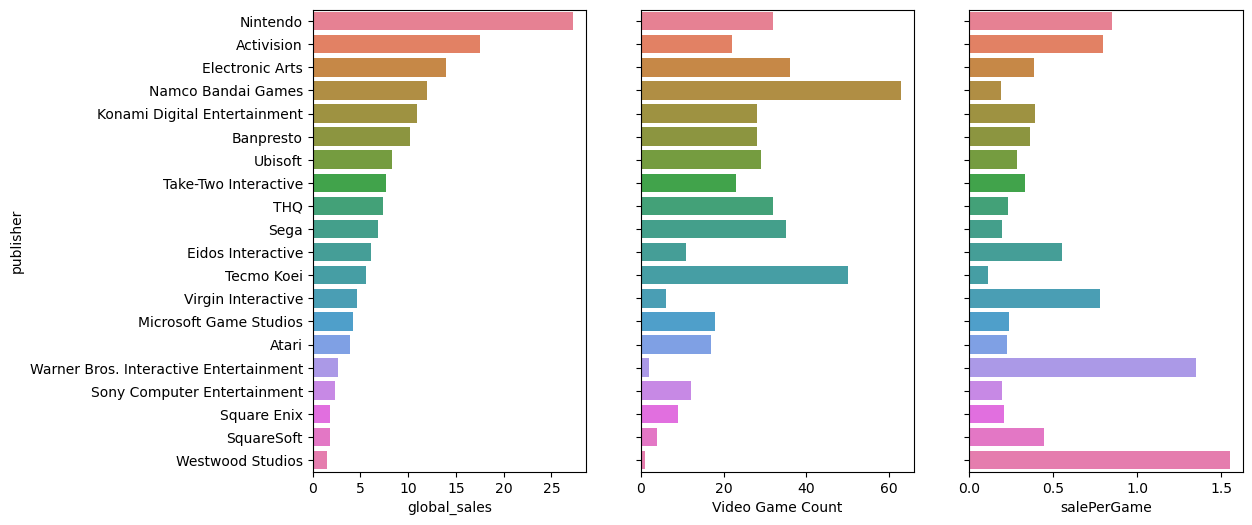

In [53]:
genres_list = list(genre_wise_game_sales.index)
for genre in genres_list:
    print("Genre: "+genre)
    genreByPublisher(genre)

## Top grossing game overall

In [54]:
max_sales = np.max(games.global_sales)
print("The top grossing games are: ") 
topGrossers = games[games.global_sales == max_sales][["name","global_sales"]]
topGrossers

The top grossing games are: 


name  global_sales
0  Wii Sports         82.53

## Top 10 games per Genre

In [55]:
def gamesPerGenre(genre):
    top_games = games[games.genre == genre][["name","global_sales"]]
    top_games = top_games.sort_values(by = "global_sales",ascending = False )
    top_games = top_games.drop_duplicates(["name"]).head(10)
    plt.rcParams['figure.figsize'] = (6,4)
    plt.figure()
    bp = sns.barplot(top_games, x = "global_sales", y = "name", orient="h")
    bp.set_ylabel("")
    bp.set_title("Top 10 "+genre+" games and their worldwide sales: ")
    for i in bp.containers:
        bp.bar_label(i,)
    plt.show()

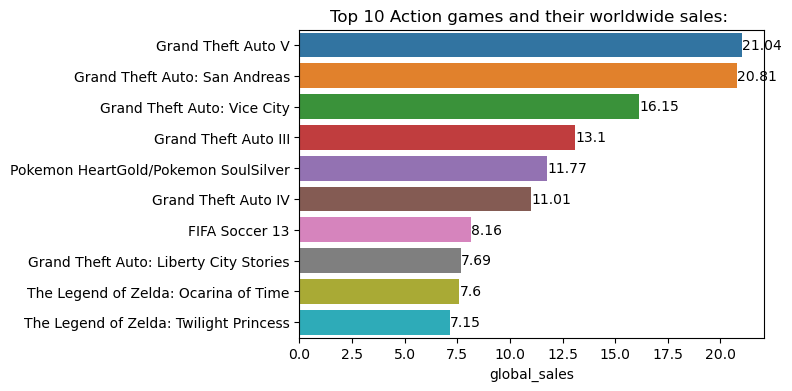

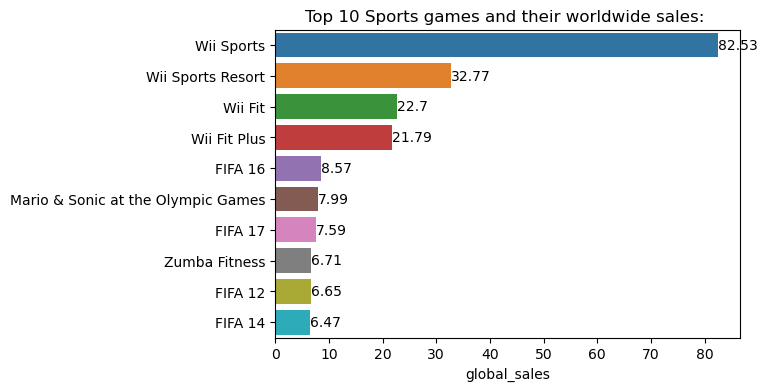

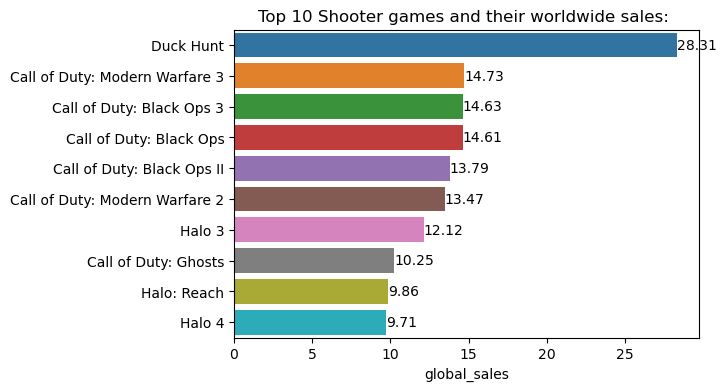

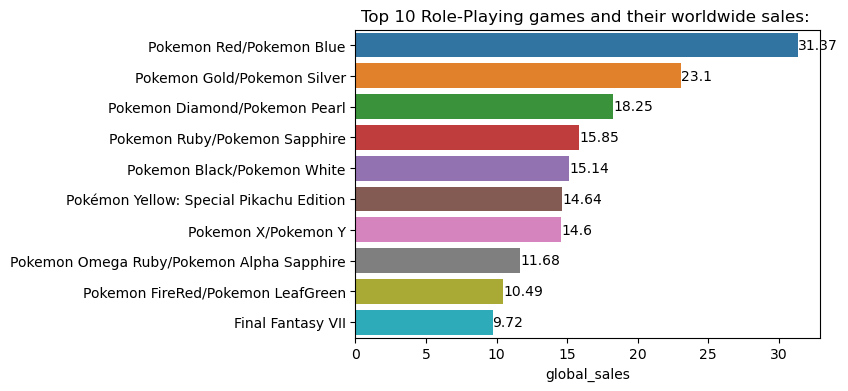

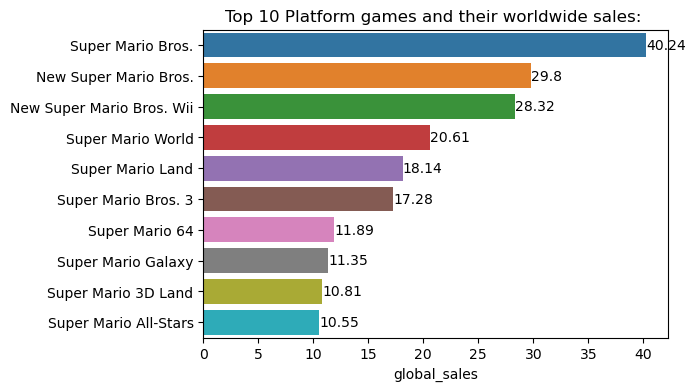

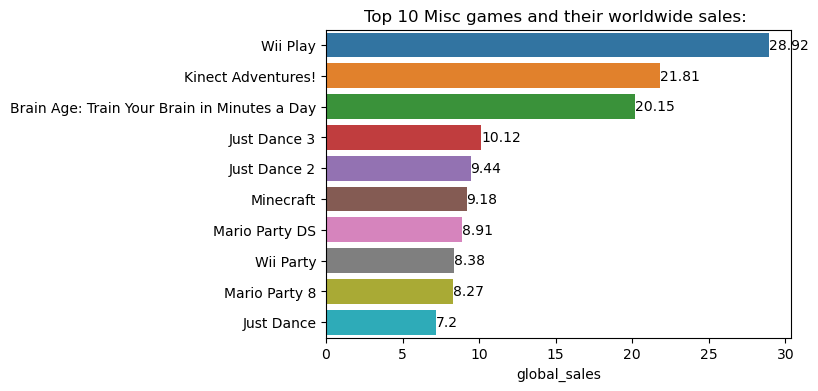

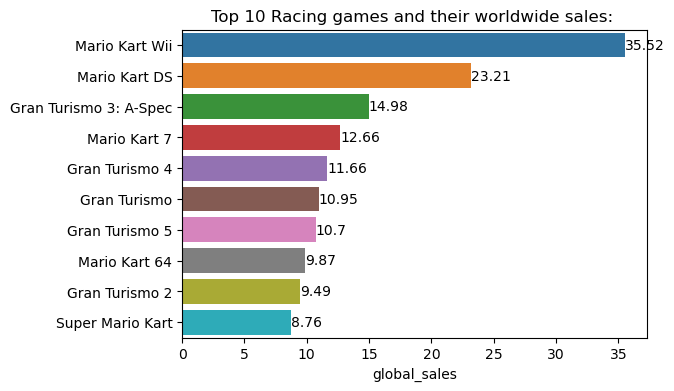

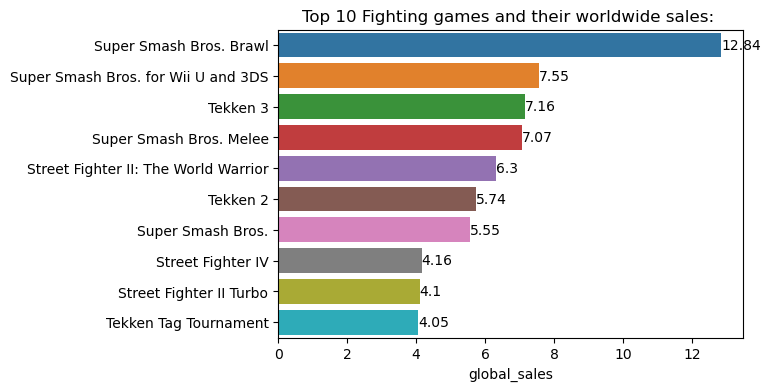

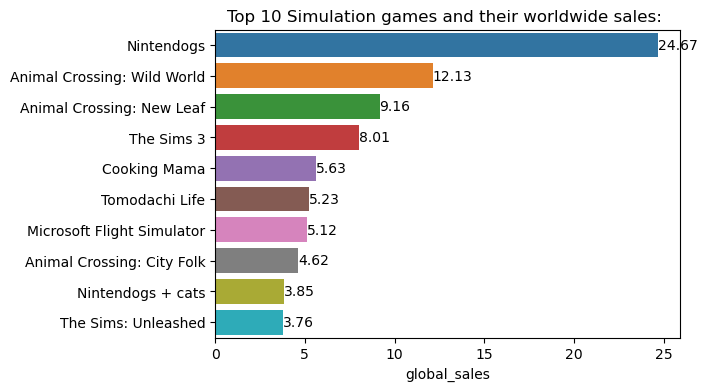

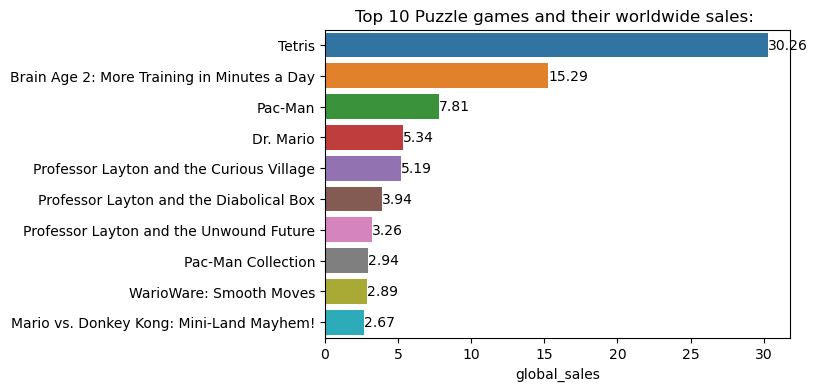

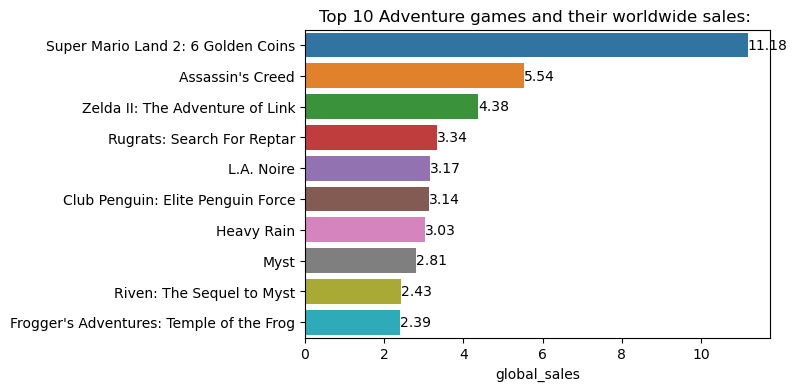

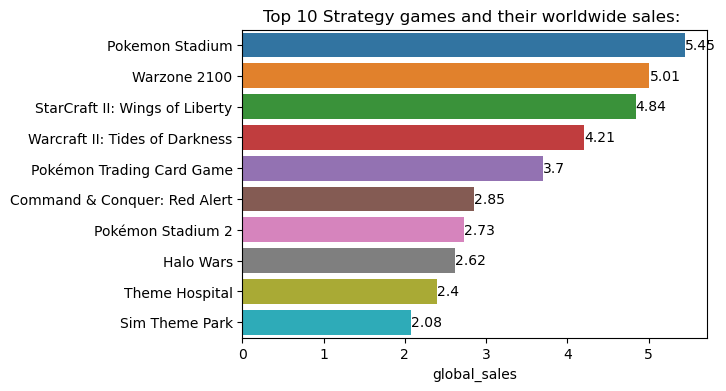

In [56]:
genres_list = list(genre_wise_game_sales.index)
for genre in genres_list:
    gamesPerGenre(genre)

 <i>
 <ul>
    <li> GTA is crushing it in the action genre. Special mention: Legend of Zelda. </li>
    <li> Wii sports being a showcase collection of five sports simulations, garnered a lot of love. FIFA is EA's GOAT, and the numbers show it.</li>
<li> Genuinely surprised that the classic 1984 Duck Hunt has outsold COD's individual titles. COD series has a chokehold on "Shooter" genre, and by the looks of it, a loyal fanbase. </li>
<li> The Pokemon series rules the roost in RPG - but the Final Fantasy series also deserves a special mention. </li>
    <li> Platform games = Super Mario - by the looks of it! </li>
    <li> Wii play encompasses multiple genres, and Kinect adventures was a early explorer of motion based gaming. Brain Age making it to the top 3 of the Misc list is a pleasant surprise. It's surprising that this featured in the misc list and not in the puzle list like it's successor. Glad to see that the iconic Just Dance series features here. </li>
    <li> Seeing "Sims" in the Simulation Game top 10 list feels fitting. Animal Crossing seems to have a long running popularity. </li>
    <li> While seeing Tetris top the chart in Puzzle games is a no brainer, I'm genuinely surprised to see the "Professor Layton" series here. </li>
    <li> The fact that I have not played any of the top 10 strategy games is plain shocking. Why doesn't AOE/Rise of Nations feature here?</li>
    </ul>
    </i>

## Global game sales by genre, publisher, and platform

In [127]:
top_sales = games.sort_values(by=['global_sales'], ascending=False).head(50)

fig = px.sunburst(top_sales, path=['genre', 'publisher', 'platform'], values='global_sales', title= 'Top 50 games by Global Sales (in millions)')

fig.update_layout(
    grid= dict(columns=2, rows=2),
    margin = dict(t=40, l=2, r=2, b=5)
)

fig.show()

## Region wise sales

In [100]:
year_wise_sales = games.loc[:, ['name', 'year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']].groupby(by =  'year_of_release'  ).sum()


fig1 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['na_sales'],
                  name = "North America's Sales",
                  line_shape='vh'
                 )

fig2 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['eu_sales'],
                  name = "Europe's Sales",
                  line_shape='vh')

fig3 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['jp_sales'],
                  name = "Japan's Sales",
                  line_shape='vh')

fig4 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['other_sales'],
                  name = "Other Sales",
                  line_shape='vh')

figs = [ fig1, fig2, fig3, fig4 ]

layout = dict(title = 'Year Wise Total Game Sales of North America, Europe, Japan and Other Countries',
              xaxis= dict(title= 'Year' ),
              yaxis= dict(title= 'Total Sales In Millions',)
             )

figure = dict(data = figs, layout = layout)

iplot(figure)

C:\Users\shralva\AppData\Local\Temp\ipykernel_22340\3129958499.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [103]:
year_wise_sales = games.loc[:, ['name', 'year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales']].groupby(by =  'year_of_release'  ).mean()


fig1 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['na_sales'],
                  name = "North America's Sales",
                  line_shape='vh'
                 )

fig2 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['eu_sales'],
                  name = "Europe's Sales",
                  line_shape='vh')

fig3 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['jp_sales'],
                  name = "Japan's Sales",
                  line_shape='vh')

fig4 = go.Scatter(x = year_wise_sales.index, y = year_wise_sales['other_sales'],
                  name = "Other Sales",
                  line_shape='vh')

figs = [ fig1, fig2, fig3, fig4 ]

layout = dict(title = 'Year Wise Average Game Sales per Title of North America, Europe, Japan and Other Countries',
              xaxis= dict(title= 'Year' ),
              yaxis= dict(title= 'Average Sales In Millions',)
             )


figure = dict(data = figs, layout = layout)

iplot(figure)

C:\Users\shralva\AppData\Local\Temp\ipykernel_22340\1846430524.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



### Highest selling game regionally

In [58]:
na_sales_max = games.na_sales.max()
print("Highest selling game in North America:")
games[games["na_sales"] == na_sales_max][["name","na_sales"]]

Highest selling game in North America:


name  na_sales
0  Wii Sports     41.36

### Highest sold Game in Europe

In [59]:
eu_sales_max = games.eu_sales.max()
print("Highest selling game in Europe:")
games[games["eu_sales"] == eu_sales_max][["name","eu_sales"]]

Highest selling game in Europe:


name  eu_sales
0  Wii Sports     28.96

### Highest selling game in Japan

In [60]:
jp_sales_max = games.jp_sales.max()
print("highest sold Game in Japan :")
games[games["jp_sales"] == jp_sales_max][["name","jp_sales"]]

highest sold Game in Japan :


name  jp_sales
4  Pokemon Red/Pokemon Blue     10.22

### Which is the highest sold Game in other geos

In [61]:
other_sales_highest_sold_game = games.other_sales.max()
print("highest sold Game in Other_Sales :")
games[games["other_sales"] == other_sales_highest_sold_game][["name","other_sales"]]

highest sold Game in Other_Sales :


name  other_sales
17  Grand Theft Auto: San Andreas        10.57

## Region wise sales sunburst, slicing by genre, publisher, platform

In [119]:
top_sales = games.sort_values(by=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], ascending=False).head(20)

# ['NA_Sales', '', '', '']
dicts_name = {
    'na_sales' : "North America Sales ( In Millions)",
    'eu_sales' : "Europe Sales ( In Millions)",
    'jp_sales' : "Japan Sales ( In Millions)",
    'other_sales' : "Other Sales ( In Millions)",
}

for (key, title) in dicts_name.items():
    
    fig = px.sunburst(top_sales, path=['genre', 'publisher', 'platform'], values=key, title= 'Top Selling by '+ title)
    
    fig.update_layout(
        grid= dict(columns=2, rows=2),
        margin = dict(t=40, l=2, r=2, b=5)
    )

    fig.show()
    
    fig = px.sunburst(top_sales, path=['publisher', 'name'], values=key, title= 'Top Selling titles by '+ title)
    
    fig.update_layout(
        grid= dict(columns=2, rows=2),
        margin = dict(t=40, l=2, r=2, b=5)
    )

    fig.show()

## Top 50 best selling games from Wikipedia:

In [9]:
url = "https://en.wikipedia.org/wiki/List_of_best-selling_video_games"
vgs = pd.read_html(url)
topsellers = vgs[1]

In [13]:
topsellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 50 non-null     object
 1   Sales                 50 non-null     int64 
 2   Series                50 non-null     object
 3   Platform(s)           50 non-null     object
 4   Initial release date  50 non-null     object
 5   Developer(s)[b]       50 non-null     object
 6   Publisher(s)[b]       50 non-null     object
 7   Ref                   50 non-null     object
dtypes: int64(1), object(7)
memory usage: 3.2+ KB


In [17]:
topsellers.head()

Title      Sales            Series        platform  \
0            Minecraft  238000000         Minecraft  Multi-platform   
1   Grand Theft Auto V  185000000  Grand Theft Auto  Multi-platform   
2          Tetris (EA)  100000000            Tetris  Multi-platform   
3           Wii Sports   82900000               Wii             Wii   
4  PUBG: Battlegrounds   75000000     PUBG Universe  Multi-platform   

   initial_release_date         developer        publisher  Ref  
0  November 18, 2011[c]    Mojang Studios   Mojang Studios  [3]  
1    September 17, 2013    Rockstar North   Rockstar Games  [4]  
2    September 12, 2006         EA Mobile  Electronic Arts  [5]  
3     November 19, 2006      Nintendo EAD         Nintendo  [6]  
4     December 20, 2017  PUBG Corporation          Krafton  [7]

In [16]:
topsellers.rename(columns = {"Developer(s)[b]":"developer","Publisher(s)[b]":"publisher","Initial release date":"initial_release_date","Platform(s)":"platform"},inplace = True)

In [21]:
topsellers.columns = [i.lower() for i in topsellers.columns]
topsellers.columns

Index(['title', 'sales', 'series', 'platform', 'initial_release_date',
       'developer', 'publisher', 'ref'],
      dtype='object')

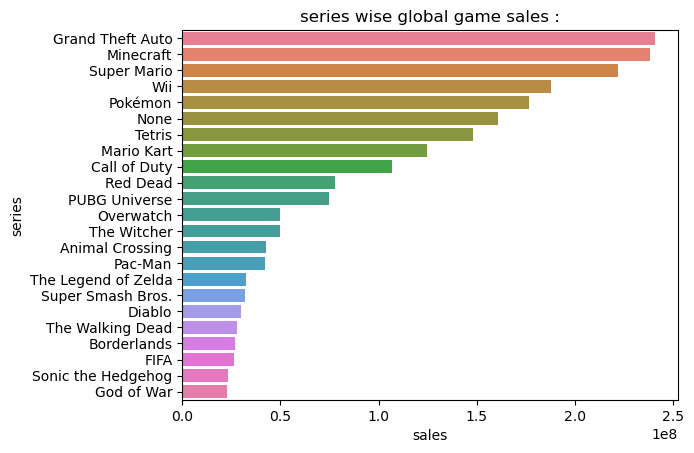

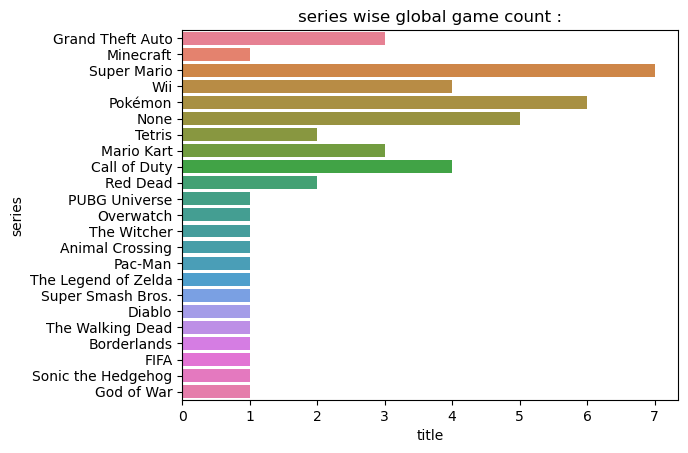

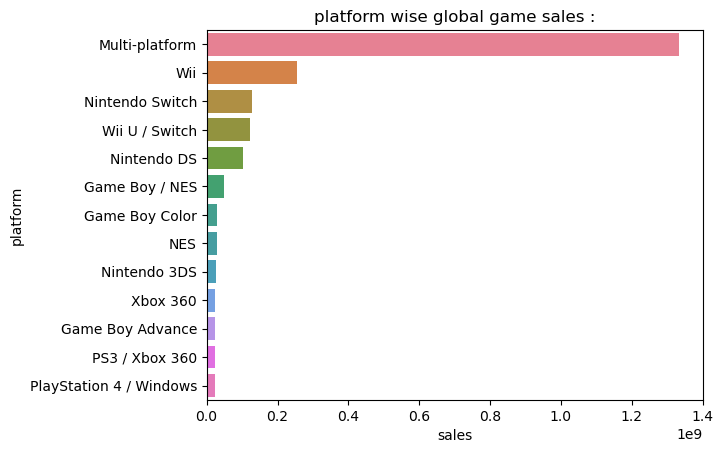

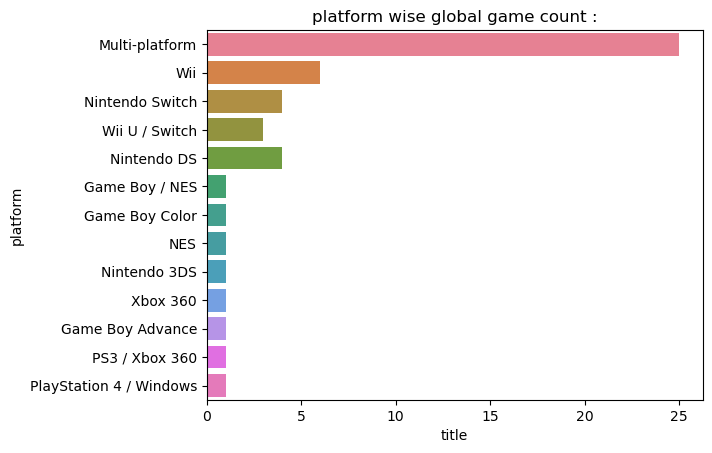

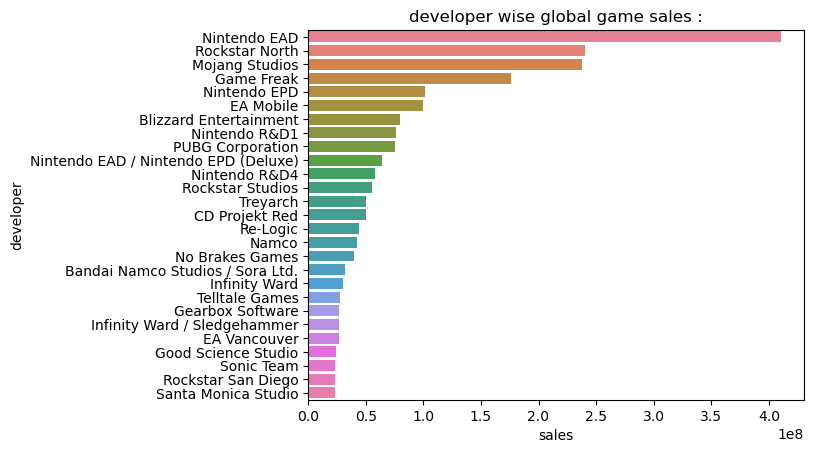

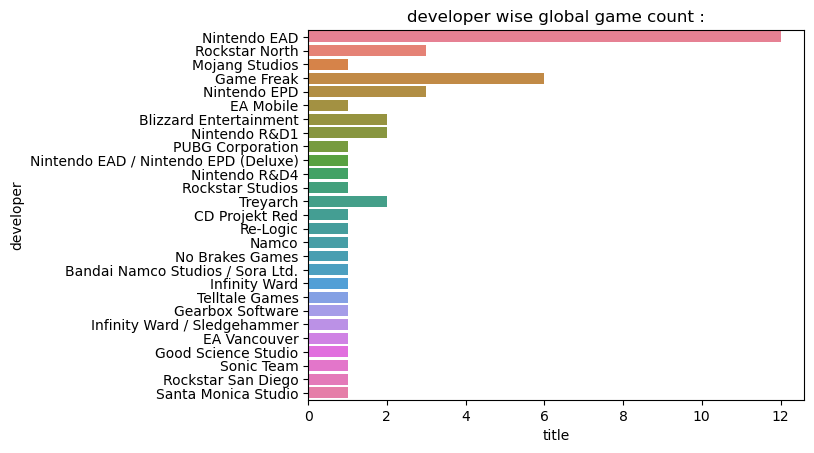

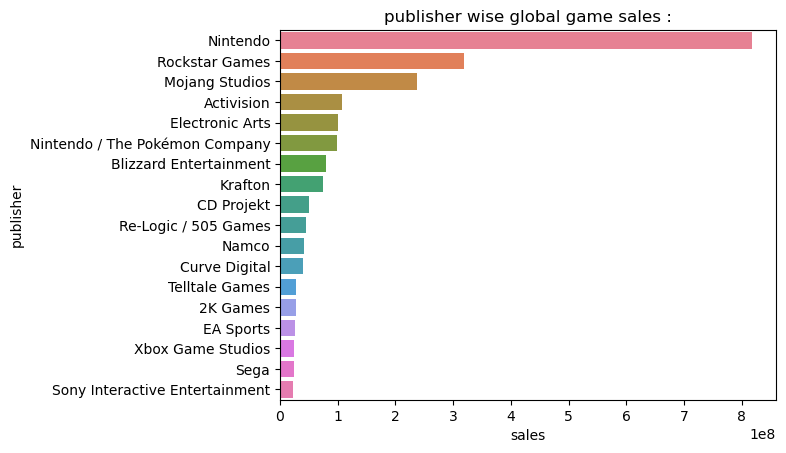

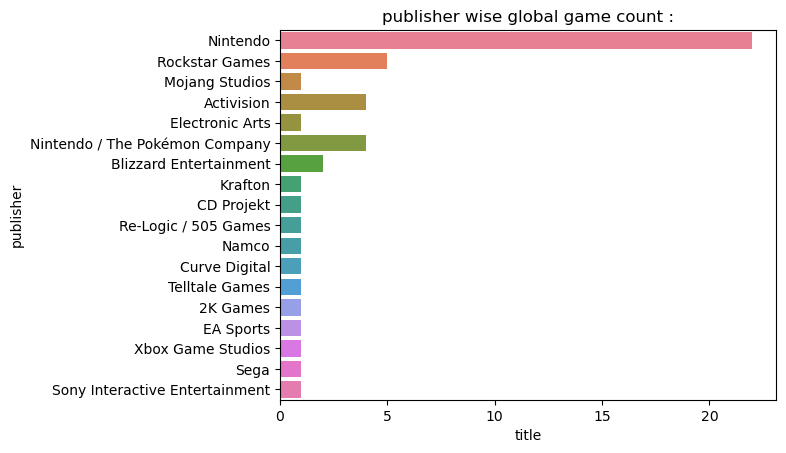

In [32]:
for col in ["series", "platform", "developer", "publisher"]:
    col_wise_game_sales  = topsellers.groupby([col])[['title','sales']].agg({'title':'count', 'sales':'sum'})
    col_wise_game_sales  = col_wise_game_sales.sort_values(by = "sales",ascending  = False)
    sns.barplot(col_wise_game_sales, x = "sales", y = col_wise_game_sales.index, orient = "h",palette = "husl")
    plt.title(col+" wise global game sales :")
    plt.show()
    #sns.barplot(col_wise_game_sales, x = "title", y = col_wise_game_sales.index, orient = "h",palette = "husl")
    #plt.title(col+" wise global game count :")
    #plt.show()

In [49]:
def format_ticks(value, pos):
    if value >= 1e6:
        return f'{value*1e-6}M'
    elif value >= 1e3:
        return f'{value*1e-3}K'
    else:
        return f'{value}'

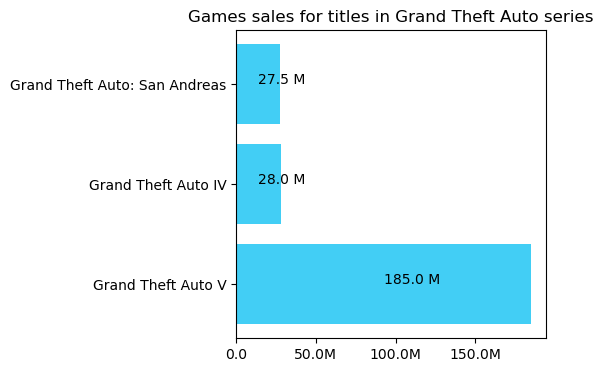

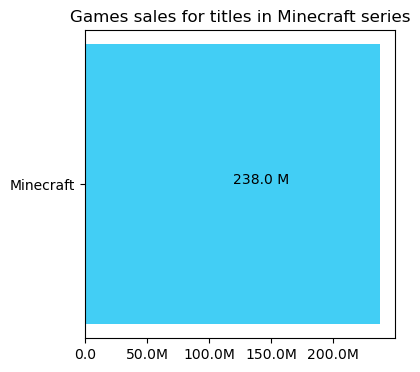

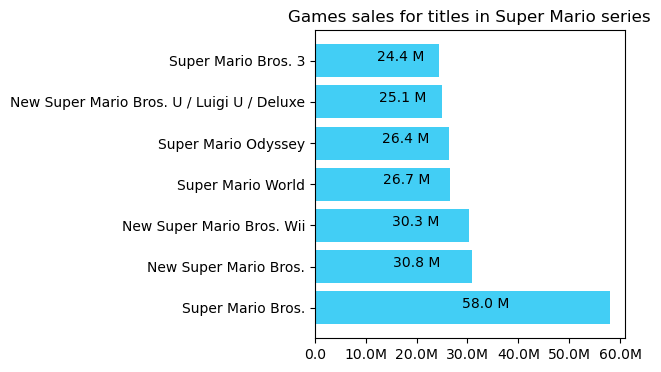

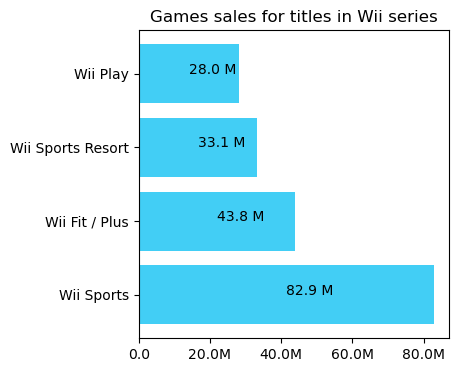

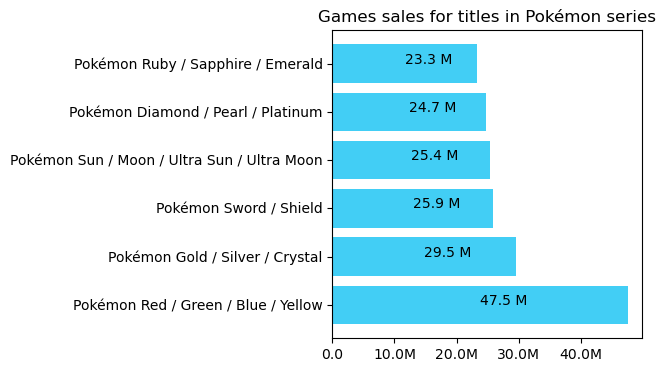

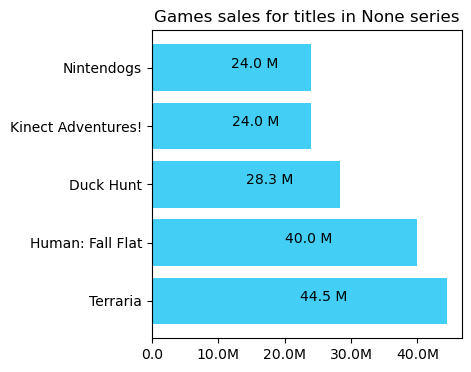

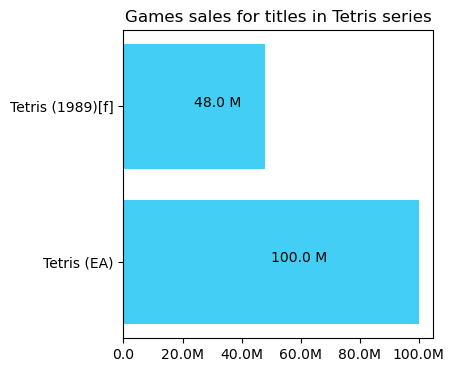

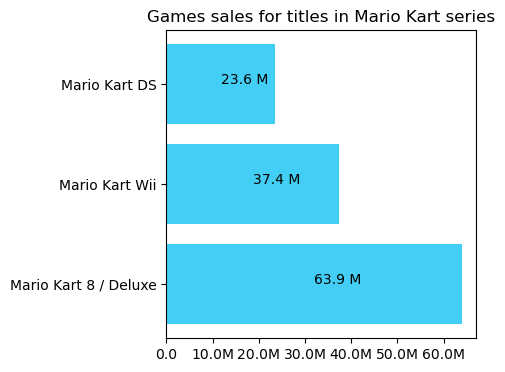

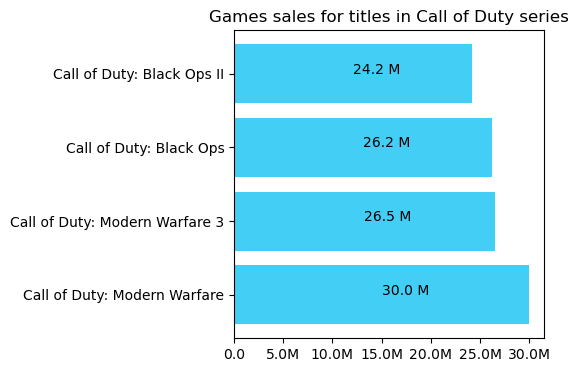

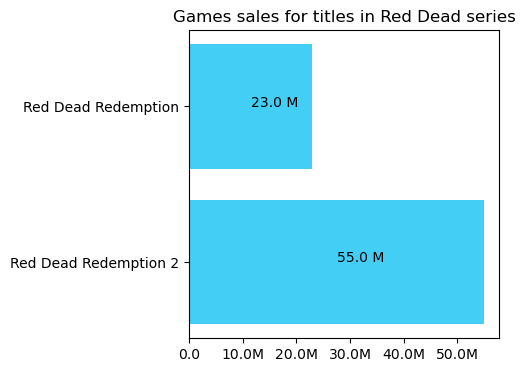

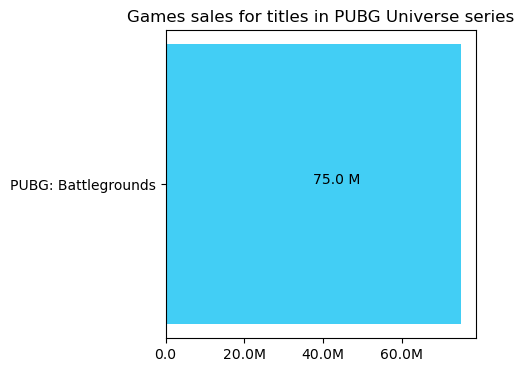

In [90]:
#top series, top titles
col_wise_game_sales  = topsellers.groupby(['series'])[['title','sales']].agg({'title':'count', 'sales':'sum'})
col_wise_game_sales  = col_wise_game_sales.sort_values(by = "sales",ascending  = False).head(11)
formatter = ticker.FuncFormatter(format_ticks)
for s in list(col_wise_game_sales.index):
    temp = topsellers[topsellers["series"] == s][["title","sales"]]
    #plt.rcParams['figure.figsize'] = (4,4)
    fig, ax = plt.subplots()
    #bp = sns.barplot(temp, x = "sales", y = "title", orient = "h",palette = "husl")
    plt.title("Games sales for titles in " + s +" series")
    plt.gca().xaxis.set_major_formatter(formatter)
    for b in ax.barh(y=temp["title"], width=temp["sales"], height=0.8, color='#42cef5'):
        w = b.get_width()
        ax.text(w*0.5, b.get_y()+0.5*b.get_height(),
            fmt.format_eng(w))
            #ha='left', va='center'
    plt.show()

In [63]:
# dropping columns
data = games.copy().dropna(how="any")
data.drop(["na_sales","eu_sales","jp_sales","other_sales"],axis = 1,inplace = True)

In [64]:
def data_encode(x_data):
    for i in x_data.columns:
        x_data[i]=x_data[i].factorize()[0]
        
    return x_data    
    
x_data = data.drop("global_sales",axis = 1)
y_data = data[["global_sales"]]
x_data = data_encode(x_data)

# Building Regression Models for global_sales

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [66]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x_data,y_data,test_size=.3,random_state=1)

## Linear Regression

In [67]:
lr_model =LinearRegression()
lr_model.fit(xtrain,ytrain)
ypred=lr_model.predict(xtest)
n = len(xtest)
p = xtest.shape[1]
r2_value = r2_score(ytest,ypred)
adjusted_r2_score = 1 - (((1-r2_value)*(n-1)) /(n-p-1))
print("r2_score for Linear Reg model : ",r2_score(ytest,ypred))
print("adjusted_r2_score Value       : ",adjusted_r2_score)                         
print("MSE for Linear Regression     : ",mean_squared_error(ytest,ypred))

r2_score for Linear Reg model :  0.24193393858652246
adjusted_r2_score Value       :  0.23783829680088975
MSE for Linear Regression     :  1.671286465032641


## Random Forest Regressor

In [68]:
r2_scores = []
adjusted_r2_scores = []
mean_squared_errors = []
r = range(1,101)
for i in r:
    rf_model = RandomForestRegressor(n_estimators=i,min_samples_split=20,random_state=43)
    rf_model.fit(xtrain,np.ravel(ytrain))
    ypred = rf_model.predict(xtest)
    n = len(xtest)
    p = xtest.shape[1]
    r2_value = r2_score(np.ravel(ytest),ypred)
    adjusted_r2_score = 1 - (((1-r2_value)*(n-1)) /(n-p-1))
    mse = mean_squared_error(np.ravel(ytest),ypred)
    r2_scores.append(r2_value)
    adjusted_r2_scores.append(adjusted_r2_score)
    mean_squared_errors.append(mse)

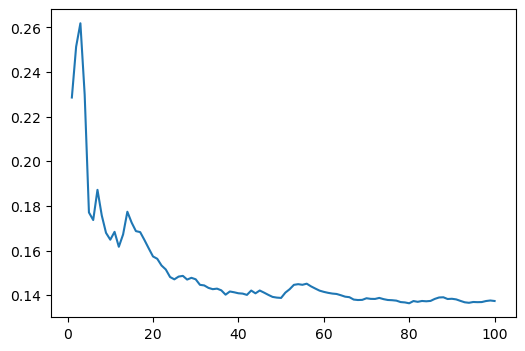

In [69]:
# random forest seems fine
plt.plot(list(r), mean_squared_errors)
plt.show()

In [70]:
print(mean_squared_errors.index(np.min(mean_squared_errors)))
print(np.min(mean_squared_errors))

79
0.13635337373275244


In [71]:
print(mean_squared_errors[49]) #50 estimators appear to be sufficient

0.1387505907965678


In [72]:
print("r2_score for Random Forest Reg model : ",r2_scores[49])
print("adjusted_r2_score Value              : ",adjusted_r2_scores[49])
print("MSE for Random Forest Regression     : ",mean_squared_errors[49])

r2_score for Random Forest Reg model :  0.9370651793785136
adjusted_r2_score Value              :  0.9367251582454899
MSE for Random Forest Regression     :  0.1387505907965678


<b> Random forest gives us the best R2 score for the task of global_sales prediction. </b>

## SVR

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

In [74]:
regr = make_pipeline(StandardScaler(), SVR(C=50, epsilon=0.2))
regr.fit(xtrain, np.ravel(ytrain))
ypred = regr.predict(xtest)
r2_value = r2_score(np.ravel(ytest),ypred)
adjusted_r2_score = 1 - (((1-r2_value)*(n-1)) /(n-p-1))
mse = mean_squared_error(np.ravel(ytest),ypred)
print("r2_score for Random Forest Reg model : ",r2_score(ytest,ypred))
print("adjusted_r2_score Value              : ",adjusted_r2_score)
print("MSE for Random Forest Regression     : ",mean_squared_error(ytest,ypred))

r2_score for Random Forest Reg model :  0.8256122482397282
adjusted_r2_score Value              :  0.8246700747282533
MSE for Random Forest Regression     :  0.3844676658403332


In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1,5,10,15,20,25,30,35,40,45,50]}
sc_x = StandardScaler()
sc_y = StandardScaler()
xtrain_scaled = sc_x.fit_transform(xtrain)
ytrain_scaled = sc_y.fit_transform(ytrain)

In [ ]:
svr = SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(xtrain, np.ravel(ytrain))

In [ ]:
sorted(clf.cv_results_.keys())